In [5]:
pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 1.1 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import os, math
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [14]:
df = pd.read_csv("/Users/kanishksri/Downloads/tsunami_dataset.csv")
df

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,...,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DAMAGE_TOTAL_DESCRIPTION,HOUSES_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,URL,COMMENTS
0,12,-330,NaN,NaN,NaN,NaN,40.000,25.000,"E. SPORADES ISLANDS, AEGEAN ISLANDS",GREECE,...,Earthquake,Very Doubtful Tsunami,7.0,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"330 B.C. Aegean Sea, Sporades Islands, 40 N 25..."
1,481,1764,2.0,11.0,NaN,NaN,51.450,-2.583,"BRISTOL, ENGLAND",UK,...,Unknown,Very Doubtful Tsunami,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"Reference #1894, in full: ""On Saturday the 11t..."
2,71,859,NaN,NaN,NaN,NaN,36.080,36.250,SAMANDAGI,TURKEY,...,Earthquake,Questionable Tsunami,NaN,NaN,3.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"859 (possibly 861), November. Levantian Sea, N..."
3,186,1580,1.0,NaN,NaN,NaN,40.000,128.000,YELLOW SEA,NORTH KOREA,...,Unknown,Very Doubtful Tsunami,NaN,NaN,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,<P><blockquote><i>Reference #414:</i></blockqu...
4,5,-1300,NaN,NaN,NaN,NaN,39.960,26.240,"IONIAN COASTS, TROAD",TURKEY,...,Unknown,Questionable Tsunami,6.0,NaN,5.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,1300 B.C. Ionian and Aegean Seas. References t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,5753,2020,7.0,22.0,6.0,12.0,55.030,-158.522,"SHUMAGIN ISLANDS, AK",USA,...,Earthquake,Definite Tsunami,7.8,28.0,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,NaN
2255,5750,2020,6.0,18.0,12.0,49.0,-33.294,-177.838,"S OF RAOUL ISLAND, KERMADEC ISLANDS",NEW ZEALAND,...,Earthquake,Definite Tsunami,7.4,10.0,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A small tsunami (12 cm) occurred today followi...
2256,5752,2013,4.0,22.0,1.0,16.0,18.081,-102.182,MEXICO,MEXICO,...,Earthquake,Probable Tsunami,6.0,30.0,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"In the same subduction zone, earthquakes of Ap..."
2257,5749,1867,6.0,10.0,NaN,NaN,-7.800,110.400,JAVA,INDONESIA,...,Earthquake,Very Doubtful Tsunami,NaN,NaN,NaN,Severe (~>$5 to $24 million),Many (~101 to 1000 houses),Few (~1 to 50 people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A seaquake was observed in the backarc. While ...


In [16]:
# Drop rows with missing locations
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Filter dataframe from the 19th century onwards
df = df[df.YEAR>=1800]

# Get positive tsunami intensity values to vary folium circle sizes
df['TS_INTENSITY'].fillna(df['TS_INTENSITY'].median(), inplace=True)
df['TS_INTENSITY_PLOT'] = df['TS_INTENSITY'] - df['TS_INTENSITY'].min() + 0.5
df

/var/folders/vm/zg6lxl4s3tq0b0kx8cfkryzm0000gn/T/ipykernel_18531/478431293.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TS_INTENSITY'].fillna(df['TS_INTENSITY'].median(), inplace=True)


,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,...,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DAMAGE_TOTAL_DESCRIPTION,HOUSES_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,URL,COMMENTS,TS_INTENSITY_PLOT
261,912,1861,6.0,5.0,NaN,NaN,-6.300,107.300,JAVA,INDONESIA,...,Questionable Tsunami,NaN,NaN,1.0,Limited (<$1 million),NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"1861, June 5, about 8:00 [local time]. On the ...",5.64
262,858,1856,3.0,NaN,NaN,NaN,-44.000,172.000,"S CANTERBURY PROVINCE, SOUTH ISLAND",NEW ZEALAND,...,Probable Tsunami,NaN,NaN,0.5,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"1856, March 1856. An eyewitness (Stadholm, ref...",5.14
263,963,1867,8.0,5.0,NaN,NaN,-33.800,151.300,SYDNEY HARBOR,AUSTRALIA,...,Very Doubtful Tsunami,NaN,NaN,-1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"August 5-13, 1867, unusual fluctuations in the...",3.64
264,738,1844,3.0,22.0,10.0,13.0,43.400,16.700,DUBROVNIK,CROATIA,...,Questionable Tsunami,NaN,NaN,2.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"1844, March 22 (23). ""An extremely strong eart...",6.64
265,816,1854,1.0,15.0,NaN,NaN,20.900,134.800,PHILIPPINE SEA,NORTHWEST PACIFIC OCEAN,...,Very Doubtful Tsunami,NaN,NaN,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,<P><blockquote><i>Reference #414:</i></blockqu...,5.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,5753,2020,7.0,22.0,6.0,12.0,55.030,-158.522,"SHUMAGIN ISLANDS, AK",USA,...,Definite Tsunami,7.8,28.0,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,NaN,5.64
2255,5750,2020,6.0,18.0,12.0,49.0,-33.294,-177.838,"S OF RAOUL ISLAND, KERMADEC ISLANDS",NEW ZEALAND,...,Definite Tsunami,7.4,10.0,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A small tsunami (12 cm) occurred today followi...,5.64
2256,5752,2013,4.0,22.0,1.0,16.0,18.081,-102.182,MEXICO,MEXICO,...,Probable Tsunami,6.0,30.0,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"In the same subduction zone, earthquakes of Ap...",5.64
2257,5749,1867,6.0,10.0,NaN,NaN,-7.800,110.400,JAVA,INDONESIA,...,Very Doubtful Tsunami,NaN,NaN,1.0,Severe (~>$5 to $24 million),Many (~101 to 1000 houses),Few (~1 to 50 people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A seaquake was observed in the backarc. While ...,5.64


In [18]:
map_ = folium.Map(location=[0.78, 113.92], tiles='openstreetmap', zoom_start=4.8)

for idx, row in df.iterrows():
    Marker([row['LATITUDE'], row['LONGITUDE']], icon=folium.Icon(color='blue', icon='tint', prefix='fa')).add_to(map_)

map_

In [20]:
map_ = folium.Map(location=[0, 0], tiles='openstreetmap', zoom_start=2.4)

for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']],
        radius=df.iloc[i]['TS_INTENSITY_PLOT']*10000,
        color='yellow', fill=True).add_to(map_)

map_

In [22]:
map_ = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=1.5)

HeatMap(data=df[['LATITUDE', 'LONGITUDE']], radius=10).add_to(map_)

# Display the map
map_


/var/folders/vm/zg6lxl4s3tq0b0kx8cfkryzm0000gn/T/ipykernel_18531/3982399954.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(countries, rotation=0, fontsize=12)


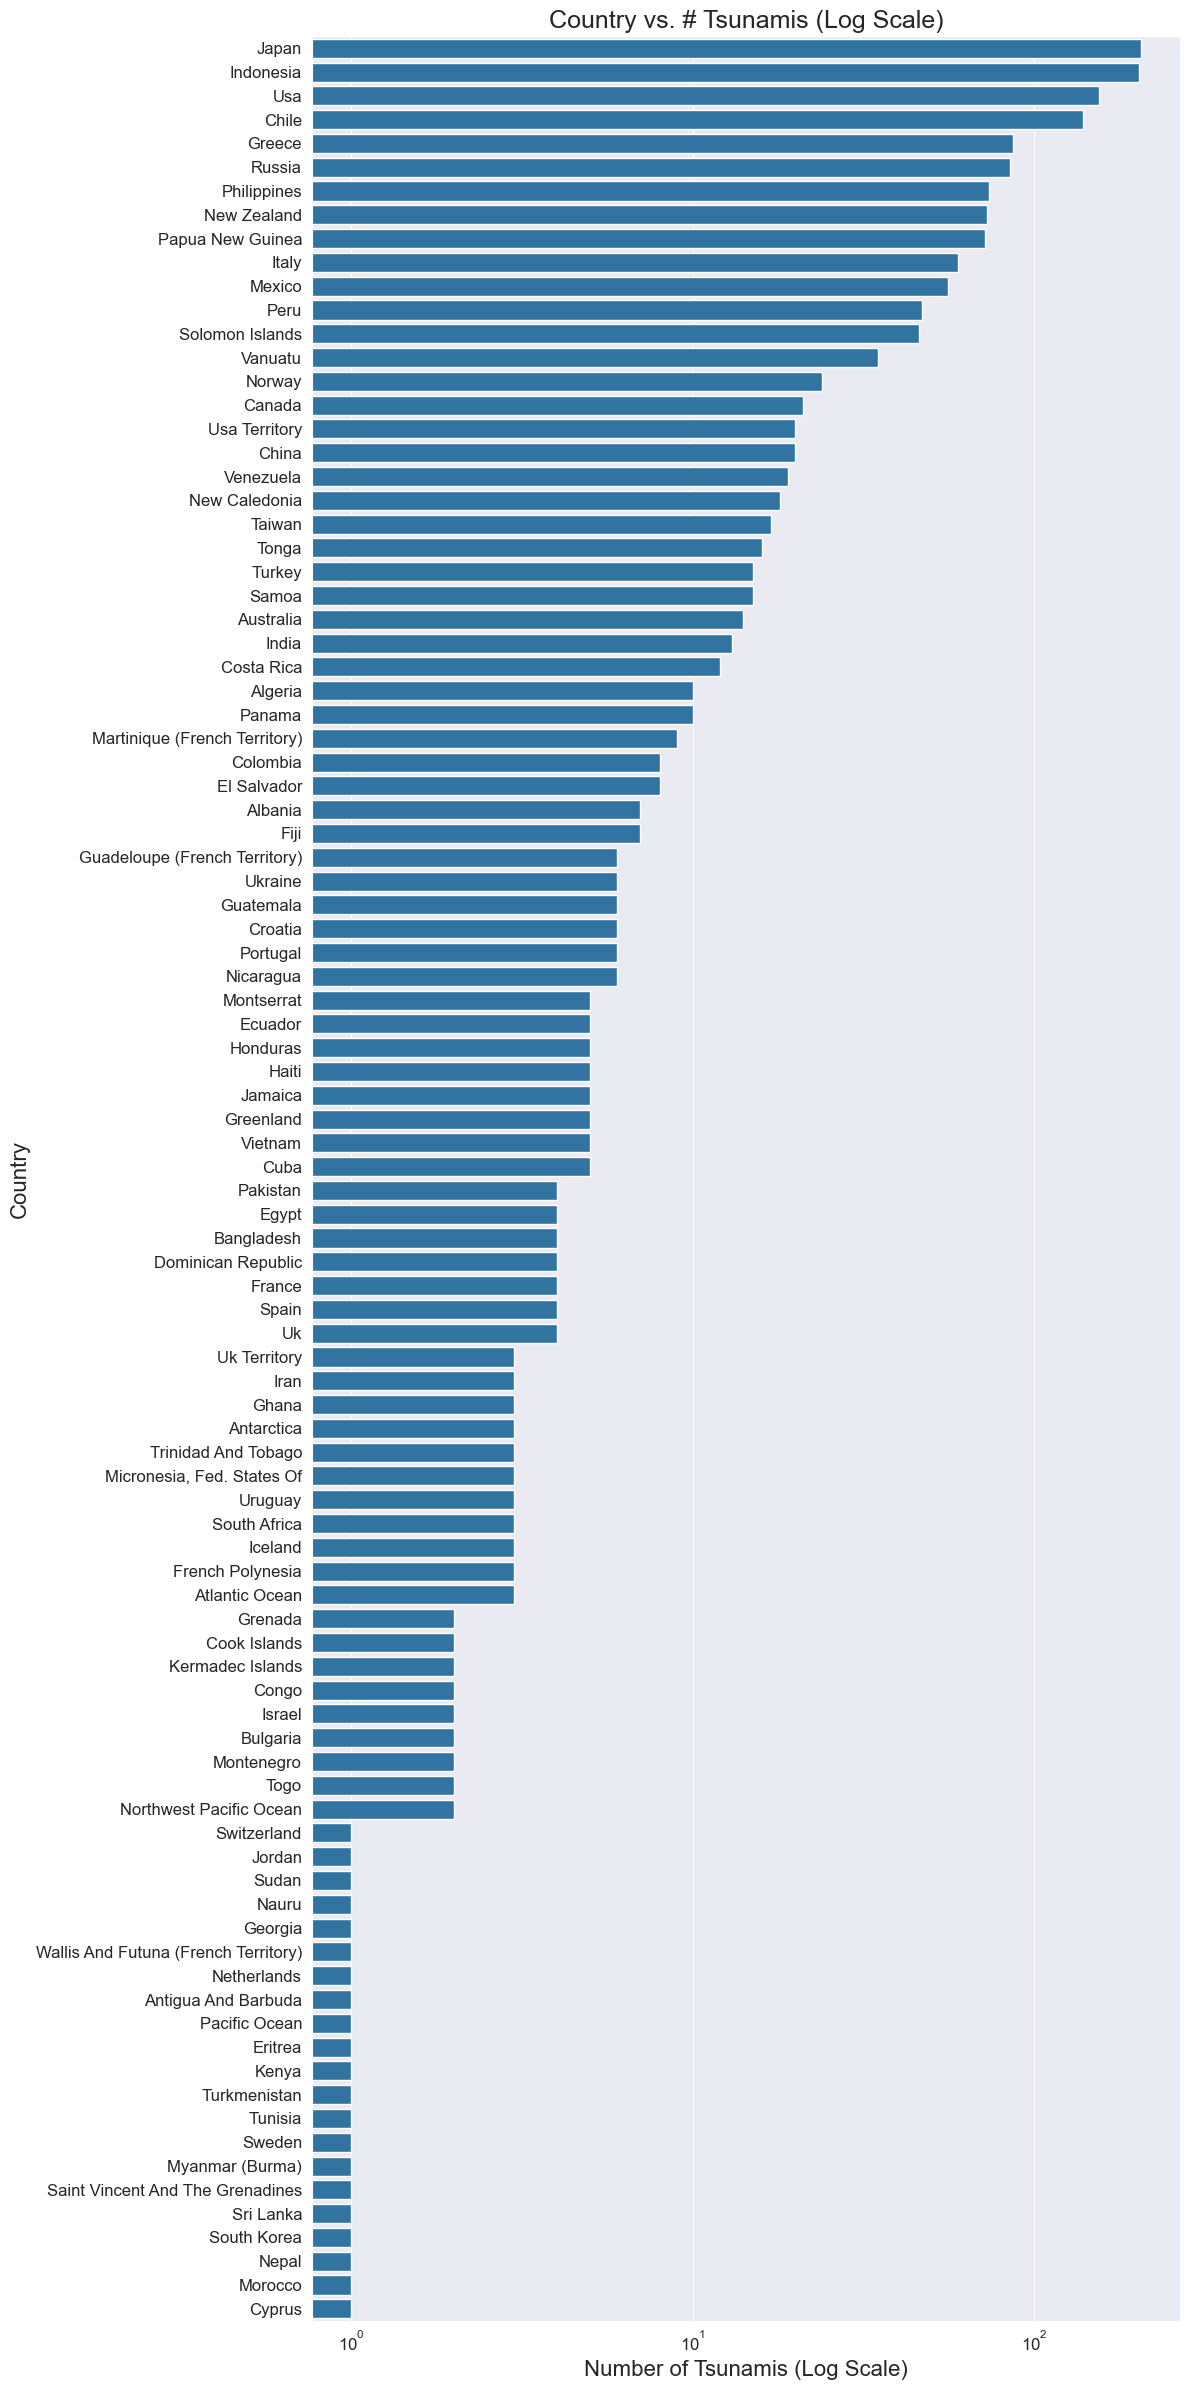

In [24]:
plt.figure(figsize=(12,24))
countries = list(map(lambda x: x.title(), df["COUNTRY"].value_counts().keys().tolist()))
ax = sns.countplot(y="COUNTRY", data=df, order=df["COUNTRY"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Country vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
ax.set_yticklabels(countries, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/vm/zg6lxl4s3tq0b0kx8cfkryzm0000gn/T/ipykernel_18531/3290535864.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(cause, rotation=0, fontsize=12)


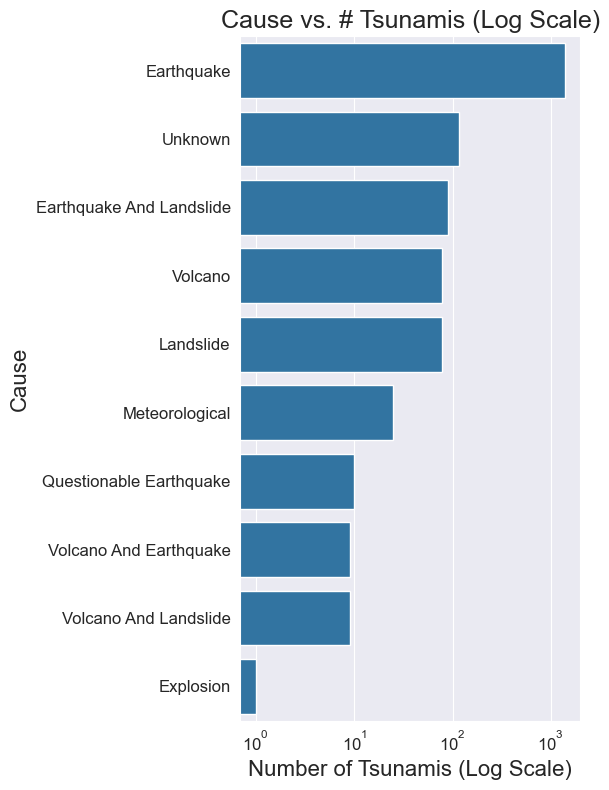

In [26]:
plt.figure(figsize=(6,8))
cause = list(map(lambda x: x.title(), df["CAUSE"].value_counts().keys().tolist()))
ax = sns.countplot(y="CAUSE", data=df, order=df["CAUSE"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Cause vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Cause",fontsize=16)
ax.tick_params(labelsize=12)
ax.set_yticklabels(cause, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/vm/zg6lxl4s3tq0b0kx8cfkryzm0000gn/T/ipykernel_18531/2590144033.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["EQ_MAGNITUDE"], kde=False)


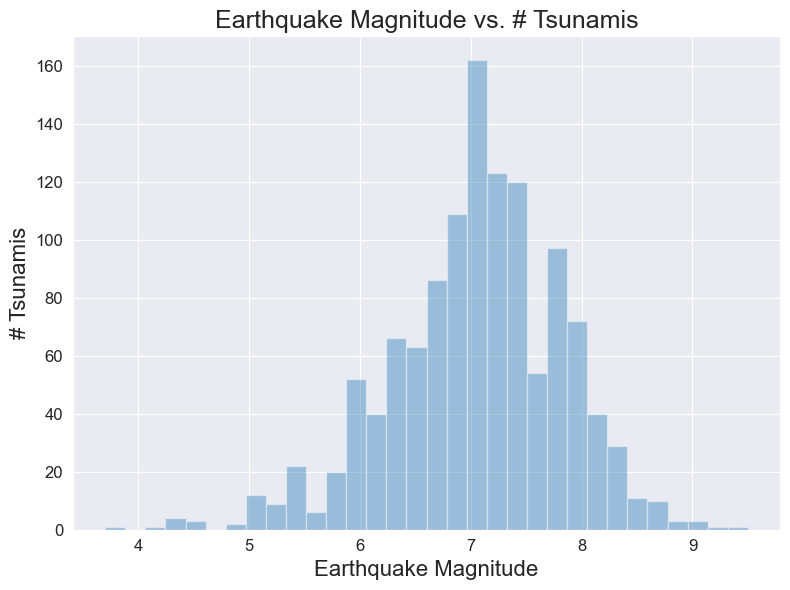

In [28]:
plt.figure(figsize=(8,6))
ax = sns.distplot(df["EQ_MAGNITUDE"], kde=False)
ax.axes.set_title("Earthquake Magnitude vs. # Tsunamis",fontsize=18)
ax.set_xlabel("Earthquake Magnitude",fontsize=16)
ax.set_ylabel("# Tsunamis",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()